<div style="background-color: black; padding: 20px; border: 10px solid grey; display: flex; align-items: center; justify-content: center; font-size: 40px; border-radius: 20px;">
    <div style="display: flex; align-items: center;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Spotify_logo_without_text.svg/2048px-Spotify_logo_without_text.svg.png" style="max-width: 150px; height:auto; margin-right: 20px;">
        <div>
            <h2 style="margin: 0;">EDA of</h2>
            <h1 style="margin: 0; color: #1ed760; font-weight: bold;">Spotify</h1>
        </div>
    </div>
</div>

Welcome to this Exploratory Data Analysis (EDA) notebook for Worshop-2! In this analysis, we will dive into a comprehensive exploration of the dataset. EDA is a crucial step in the data analysis process, allowing us to understand the structure of the data.

<h3 style="margin: 0; font-weight: bold;">Objectives</h3>


The primary objectives of this EDA are as follows:

1. **Understand the Data:** Get an overview of the dataset's structure, features, and general statistics.
2. **identify possible transformations and apply them:** Identify and handle missing values, or any inconsistencies in the data.
3. **Visualizations:** Create informative visualizations to better understand the data and convey insights.

---

<h3 style="margin: 0; font-weight: bold;">Beginning of Exploratory Data Analysis (EDA)</h3>

Set your work directory, be sure of have you own file (`.env`) with your environment variables, in this case 'WORK_DIR' 

In [1]:
import sys
import os

work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

Import the neccesary libreries and modules

In [2]:
from airflow.transfromations.transformations import drop_columns, drop_null_values, drop_duplicates, categorize_column, convert_duration, map_genre_to_category 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

Read spotify dataset and save it as a pandas Dataframe

In [3]:
file_path = '../data/spotify_dataset.csv'
df = pd.read_csv(file_path)

This summary helps in understanding the size and structure of the dataset.

In [4]:
print(f"Number of Row : {df.shape[0]}\nNumber of Columns : {df.shape[1]}")
print('Structure of the DataFrame'.center(75, '-'))
df.head(5)

Number of Row : 114000
Number of Columns : 21
-------------------------Structure of the DataFrame------------------------


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


This summary provides a  overview of characteristics of the dataset, facilitating initial EDA and quality assessment.

- **Data Types:** Indicates the data type of each column in our DataFrame (`df`). (objects, ints, boolean and floats) 

- **Null Count:** Shows the number of null or missing values in each column. ~ This dataset contains only one record with null values in the columns [`'artists', 'album_name' and 'track_name'`] so this record probably will be deleted

- **Unique Values:** Represents the count of unique values in each column. ~ In this case, it is normal that there are few non-unique values.

- **Duplicate Count:** Displays the number of duplicate rows in the DataFrame. ~ Apparently this dataset does not contain duplicate values

In [5]:
df_summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'unique values': df.nunique(),
    'duplicate count': df.duplicated().sum(),
})

table = PrettyTable()
table.field_names = ["Column", "Data Type", "Null Count", "Unique Values", "Duplicate Count"]

for column in df_summary.index:
    data_type = df_summary.loc[column, 'dtypes']
    null_count = df_summary.loc[column, 'null count']
    unique_values = df_summary.loc[column, 'unique values']
    duplicate_count = df_summary.loc[column, 'duplicate count']
    table.add_row([column, data_type, null_count, unique_values, duplicate_count])

print(table)

+------------------+-----------+------------+---------------+-----------------+
|      Column      | Data Type | Null Count | Unique Values | Duplicate Count |
+------------------+-----------+------------+---------------+-----------------+
|    Unnamed: 0    |   int64   |     0      |     114000    |        0        |
|     track_id     |   object  |     0      |     89741     |        0        |
|     artists      |   object  |     1      |     31437     |        0        |
|    album_name    |   object  |     1      |     46589     |        0        |
|    track_name    |   object  |     1      |     73608     |        0        |
|    popularity    |   int64   |     0      |      101      |        0        |
|   duration_ms    |   int64   |     0      |     50697     |        0        |
|     explicit     |    bool   |     0      |       2       |        0        |
|   danceability   |  float64  |     0      |      1174     |        0        |
|      energy      |  float64  |     0  

Visualize the count of different data types (`dtypes`)

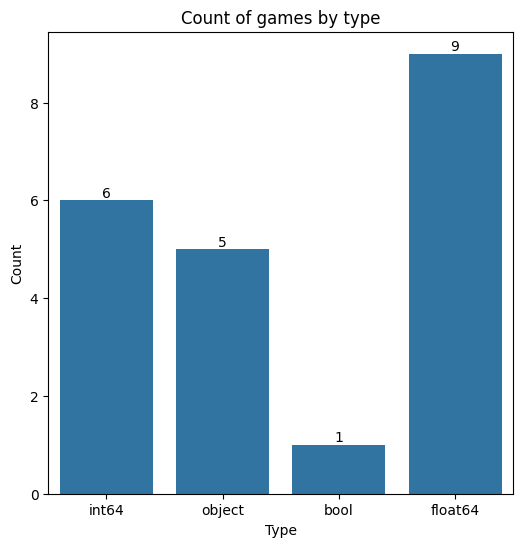

In [6]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='dtypes', data=df_summary)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Count of games by type')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

Descriptive summary giving statistics for various features of a dataset

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,114000.0,56999.500000,32909.109681,0.000,28499.75000,56999.500000,85499.2500,113999.000
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996


Let's analyze the columns of our interest:

1. Unnamed: 0: This column appears to be an index or unique identifier for each observation in the data set. Its minimum value is 0 and the maximum value is 113999, suggesting that there are a total of 114000 observations in the data set. But this column are not gonna be take into acount, so will be deleted.

2. popularity: This column represents the popularity of the songs, with an average of 33.24 and a range from minumun 0 to maximun 100. A high value indicates higher popularity, while a low value indicates lower popularity. We can conclude that the songs in this dataset have quite varied popularity.

3. duration_ms: The duration of the songs is represented in milliseconds. The average is about 228029 ms (about 3.8 minutes), with a standard deviation of about 107297 ms. The duration varies from very low values to extremely high values, with a maximum of 5237295 ms maybe this duration correspond from a podcast. 

4. danceability: This column indicates how suitable a song is for dancing, with values between 0 and 1. A higher value suggests that the song is more suitable for dancing. The average is about 0.57, indicating that songs tend to have a moderate tendency toward danceability.

5. energy: The energy of a song refers to the perceived intensity and activity of the music. With an average of about 0.64, the songs in this data set appear to have moderate to high energy overall. At this point we could ask ourselves if a higher energy score affects the danceability column.

6. speechiness: This column indicates the presence of spoken words in the songs. With a mean of approximately 0.08 and values ranging from 0 to 0.97, it suggests that the songs in this dataset vary in terms of the amount of spoken words they contain. A higher value indicates a greater presence of spoken words, possibly indicating more talkative or rap-like songs.

7. valence: Valence represents the musical positiveness conveyed by a track. With a mean of approximately 0.47 and values ranging from 0 to 1, it suggests that the songs in this dataset vary in terms of their emotional content. A higher value indicates a more positive or happier tone.

---

Droping column [`'Unnmaed: 0'`]

In [8]:
columns_drop = ['Unnamed: 0']
drop_columns(df, columns_drop)

df.head(2)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic


Verificamos si esta columna afectaba en los valores de nuestro `df`

In [9]:
df_summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'unique values': df.nunique(),
    'duplicate count': df.duplicated().sum(),
})

print(df_summary)

                   dtypes  null count  unique values  duplicate count
track_id           object           0          89741              450
artists            object           1          31437              450
album_name         object           1          46589              450
track_name         object           1          73608              450
popularity          int64           0            101              450
duration_ms         int64           0          50697              450
explicit             bool           0              2              450
danceability      float64           0           1174              450
energy            float64           0           2083              450
key                 int64           0             12              450
loudness          float64           0          19480              450
mode                int64           0              2              450
speechiness       float64           0           1489              450
acousticness      fl

The Unnamed : 0 column did not allow us to see duplicate records, later these records should be eliminated. 

#### **Handle with null values**

In [10]:
colums_drop_na = ['artists']
drop_null_values(df, colums_drop_na)

df.isnull().sum()   

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Dataset free of null values

#### **Handle with duplicated values**

Locate and inspect duplicate rows

In [11]:
df.loc[df.duplicated()]


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238000,0.860000,0.0571,0.843,90.522,4,afrobeat
2155,2aibwv5hGXSgw7Yru8IYTO,Red Hot Chili Peppers,Stadium Arcadium,Snow (Hey Oh),80,334666,False,0.427,0.900,11,-3.674,1,0.0499,0.116000,0.000017,0.1190,0.599,104.655,4,alt-rock
3738,7mULVp0DJrI2Nd6GesLvxn,Joy Division,Timeless Rock Hits,Love Will Tear Us Apart,0,204621,False,0.524,0.902,2,-8.662,1,0.0368,0.000989,0.695000,0.1370,0.907,146.833,4,alternative
4648,6d3RIvHfVkoOtW1WHXmbX3,Little Symphony,Serenity,Margot,27,45714,False,0.269,0.142,0,-23.695,1,0.0509,0.866000,0.904000,0.1140,0.321,67.872,3,ambient
5769,481beimUiUnMUzSbOAFcUT,SUPER BEAVER,突破口 / 自慢になりたい,突破口,54,255080,False,0.472,0.994,8,-1.786,1,0.1140,0.025900,0.000000,0.0535,0.262,103.512,4,anime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111246,0sSjIvTvd6fUSZZ5rnTPDW,Everything But The Girl,Eden (Deluxe Edition),Another Bridge - 2012 Remaster,26,132826,False,0.480,0.853,0,-6.276,1,0.0734,0.030600,0.000001,0.3200,0.775,85.181,4,trip-hop
111362,2zg3iJW4fK7KZgHOvJU67z,Faithless,Faithless 2.0,Tarantula,21,398152,False,0.622,0.816,6,-11.095,0,0.0483,0.009590,0.578000,0.0991,0.427,136.007,4,trip-hop
111980,46FPub2Fewe7XrgM0smTYI,Morcheeba,Parts of the Process,Undress Me Now,17,203773,False,0.576,0.352,7,-10.773,0,0.0268,0.700000,0.270000,0.1600,0.360,95.484,4,trip-hop
112968,6qVA1MqDrDKfk9144bhoKp,Acil Servis,Küçük Adam,Bebek,38,319933,False,0.486,0.485,5,-12.391,0,0.0331,0.004460,0.000017,0.3690,0.353,120.095,4,turkish


Effectively all rows are the same

In [12]:
rows_duplicated = df[df['track_id'] == "0CDucx9lKxuCZplLXUz0iX" ]
rows_duplicated

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


**Droping duplicated values**

In [13]:
drop_duplicates(df)
df.loc[df.duplicated()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Analyze the current size of our dataset

In [14]:
df.shape  

(113549, 20)

---
<h3 style="margin: 0; font-weight: bold;">Track_id</h3>

The column 'track_id' will be our identifier column, it is supposed to be a unique record, let's see what happens with this column 

In [15]:
track_id_counts = df['track_id'].value_counts()

print(track_id_counts)

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
2qgXrzJsry4KgYoJCpuaul    7
0RSGPiykniIg8m7JhiAVv7    7
                         ..
22Lhq4mVPFWv3bjchAFDOl    1
0oz9ITtPIt3iI1nzdVX9L2    1
1qFmSPALGSoqjbwM3br4Rl    1
1PTt5Oa80JGSBCrzzfhtn6    1
2hETkH7cOfqmz3LqZDHZf5    1
Name: count, Length: 89740, dtype: int64


There are 'ids' that are repeated up to 9 times ¿eliminating the null rows was not enough? Let's see what happens with the id that repeats the most times

In [16]:
filtered_df = df[df['track_id'] == '6S3JlDAGk3uu3NtZbPnuhS']
filtered_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8315,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,blues
19759,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,country
34728,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,folk
62226,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-pop
63087,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,j-rock
82064,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,power-pop
84129,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,psych-rock
99727,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,singer-songwriter
102732,6S3JlDAGk3uu3NtZbPnuhS,Badfinger,Straight Up (Remastered 2010 / Deluxe Edition),Baby Blue - Remastered 2010,67,217346,False,0.623,0.876,11,-7.788,1,0.066,0.0189,0.0134,0.0728,0.515,124.431,4,songwriter


After this analysis we see that it does make sense to repeat these rows since the `'track_genre'` changes and this is important for our analysis.

---

<h3 style="margin: 0; font-weight: bold;">Artists</h3>


Let's analyze and summarize data related to artists

In [17]:
num_artists = df['artists'].nunique()
print("Total number of artists:", num_artists)

popular_artists = df.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]
popular_artists

Total number of artists: 31437


artists
The Beatles        279
George Jones       260
Stevie Wonder      235
Linkin Park        224
Ella Fitzgerald    221
Name: popularity, dtype: int64

There are a total of 31,437 unique artists in the dataset. Furthermore, it lists the top five artists with the highest popularity scores. "The Beatles" tops the list with a popularity count of 279, followed by "George Jones" with 260, "Stevie Wonder" with 235, "Linkin Park" with 224, and "Ella Fitzgerald" with 221. 

In addition we can see this result in a graph

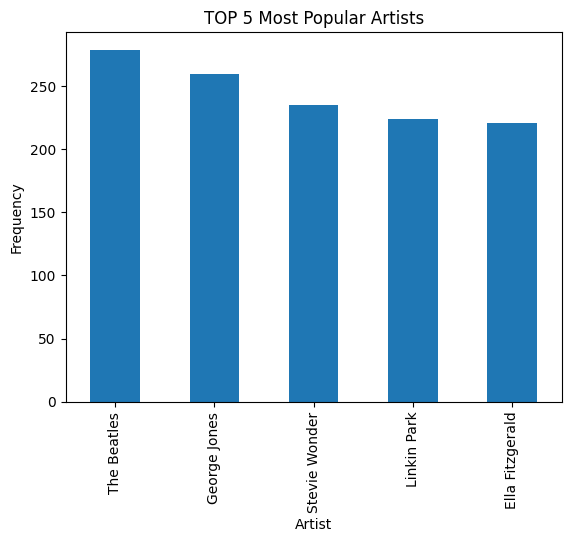

In [18]:
popular_artists.plot.bar()
plt.title("TOP 5 Most Popular Artists")
plt.xlabel("Artist")
plt.ylabel("Frequency")
plt.show()

---
<h3 style="margin: 0; font-weight: bold;">Album Name</h3>


Now with this column we can see which albums appear the most in the dataset, but are these the most popular?

In [19]:
top_albums = df['album_name'].value_counts().head(10)
top_albums

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    180
Metal                          143
Halloween con perreito         122
Halloween Party 2022           114
The Complete Hank Williams     110
Fiesta portatil                108
Frescura y Perreo              106
Esto me suena a Farra          105
On air 70's Hits               101
Name: count, dtype: int64

On a scale from 0 to 100 in popularity these are the most popular albums

In [20]:
popularity_album = df.groupby([df['album_name']])['popularity'].mean().sort_values(ascending = False)
popularity_album[:10]

album_name
Unholy (feat. Kim Petras)                                              100.0
Quevedo: Bzrp Music Sessions, Vol. 52                                   99.0
La Bachata                                                              98.0
Indigo (Extended)                                                       96.0
I Ain’t Worried (Music From The Motion Picture "Top Gun: Maverick")     96.0
PROVENZA                                                                93.0
RENAISSANCE                                                             93.0
Calm Down (with Selena Gomez)                                           92.0
Super Freaky Girl                                                       92.0
Harry's House                                                           92.0
Name: popularity, dtype: float64

---
<h3 style="margin: 0; font-weight: bold;">Track name</h3>
   

As with the albums, with this column we can see the most repeated songs in the dataset.

In [21]:
top_songs = df['track_name'].value_counts().head(10)
print(top_songs)

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 80
Little Saint Nick - 1991 Remix     74
Christmas Time                     72
Last Last                          70
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           57
X ÚLTIMA VEZ                       57
Name: count, dtype: int64


We note that the song `Run Rundolph Run` is the song that appears the most in our dataset with a total of 151 appearances, it appears in different albums

In [22]:
song_info = df[df['track_name'] == 'Run Rudolph Run']
song_info

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
8163,1S4rxDloMtAduogKeiJZmR,Chuck Berry,CHRISTMAS TOP HITS 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8164,03MW3H9B2P7tgpvzG3klNI,Chuck Berry,pov: you hear the bells jingle,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8165,52MCmoSCtPRbVN5Njdo6G5,Chuck Berry,Weihnachten Playlist,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8166,7m4luTtlene5vS6xUvWxRt,Chuck Berry,Holidays Are Coming,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
8168,3RXAcz7Sa6JDZSxcH1EEQ6,Chuck Berry,Best Christmas Songs 2022 | For under the Mist...,Run Rudolph Run,1,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92043,3iyTXUFlm1YrquUUgXlPM1,Chuck Berry,All I want For Christmas Is Music,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92044,0XgmLT6nDInA6w2yxpVsZh,Chuck Berry,Rockin' Around The Christmas Tree 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92046,4vJrtcgQoULwkPyFkXNYCx,Chuck Berry,pov: you bake cookies,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly
92049,3IUpuyEMIgt4GvEZ2TqERF,Chuck Berry,Jingle Bell Rock 2022,Run Rudolph Run,0,162897,False,0.647,0.876,10,-5.662,1,0.1850,0.881,0.000036,0.2600,0.949,151.925,4,rockabilly


In [23]:
song_info['popularity'].mean()

0.423841059602649

Although the song is found many times in the dataset, according to its average popularity (approximately 43) the song is not very popular.

---
<h3 style="margin: 0; font-weight: bold;">Popularity</h3>

As mentioned above, this column is on a scale from 0 to 100, let's see which are the most popular songs.

In [24]:
top_songs = df.sort_values(by='popularity', ascending=False).head(5)

view = ['track_name', 'popularity']
print(f"The 5 most popular songs: \n {top_songs[view]}")


The 5 most popular songs: 
                                   track_name  popularity
81051              Unholy (feat. Kim Petras)         100
20001              Unholy (feat. Kim Petras)         100
51664  Quevedo: Bzrp Music Sessions, Vol. 52          99
68303                             La Bachata          98
81210                        I'm Good (Blue)          98


"Unholy (feat. Kim Petras)" appears twice but have different 'track_genre'. Additionally, there are other songs listed such as "Quevedo: Bzrp Music Sessions, Vol. 52", "La Bachata", and "I'm Good (Blue)".

Now we can see the less popular songs

In [25]:
not_popular_songs = df.sort_values(by='popularity', ascending=True).head(5)

view = ['track_name', 'popularity']
print(f"The 5 least popular songs:\n{not_popular_songs[view]}")

The 5 least popular songs:
              track_name  popularity
30033           Sunshine           0
30375               Stay           0
30373               Stay           0
30371            Get Low           0
93885  Друзья / Οι φίλοι           0


Names listed are "Sunshine," "Stay" (appears twice), "Get Low," and "Друзья / Οι φίλοι". This suggests that these songs have not received any popularity rating and have the lowest possible rating in the dataset.

For better analysis and understanding of the dat, the decision was take dividing the popularity scores into bins such as 'Low', 'Medium-Low', 'Medium-High', and 'High', it provides a clearer representation of the popularity levels of songs. 

This categorization enables easier interpretation and comparison of the popularity of songs within different ranges, facilitating insights into trends or patterns based on popularity. 

In [26]:
categorize_column(df, 'popularity', bins=[0, 25, 50, 75, 101], labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
df


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_category
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,Medium-High
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,Medium-High
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,Medium-High
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,Medium-High
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,Low
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,Low
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,Low
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,Medium-Low


We moved from having the 'popularity' column in a number to have it in a category in order to improve the comprehension in the future dashboard.

---
<h3 style="margin: 0; font-weight: bold;">Durarion ms</h3>

This column is in a time format in milliseconds but this is not understandable at first sight, additionally we can see that there are records that have a very long duration so probably the dataset contains podcast information or other similar formats. 

In [27]:
df['duration_ms'].min(), df['duration_ms'].max()

(8586, 5237295)

We change the millisecond format column to minutes with seconds which offers a better understanding of the row. 

In [28]:
convert_duration(df, 'duration_min_sec', 'duration_ms')

view = ['album_name','duration_ms' ,'duration_min_sec']
df[view].head(2)

,album_name,duration_ms,duration_min_sec
0,Comedy,230666,03:50
1,Ghost (Acoustic),149610,02:29


Now observing the records that have a longer duration we can see that they are mixes of the same song for a long time.

In [29]:
long_songs = df[["track_name", "duration_min_sec"]].sort_values(by="duration_min_sec", ascending=False)[:5]
long_songs

,track_name,duration_min_sec
65475,Om Bhurbhuwasah,55:40
10739,"Welcome To The Jungle - Continuous DJ Mix, Pt. 1",54:34
25798,Der ultimative Wendler Hitmix XL,49:19
78385,Der ultimative Wendler Hitmix XL,49:19
65744,Shiv Amritwani,49:17


---
<h3 style="margin: 0; font-weight: bold;">Explicit</h3>

This column has only two values 'True' if the song is explicit or 'False' if it is not, this can be used to apply a filter to younger people.

In [30]:
explicit_count = df['explicit'].value_counts()
explicit_count

explicit
False    103831
True       9718
Name: count, dtype: int64

We can observe that most of the songs in our dataset are not explicit. 

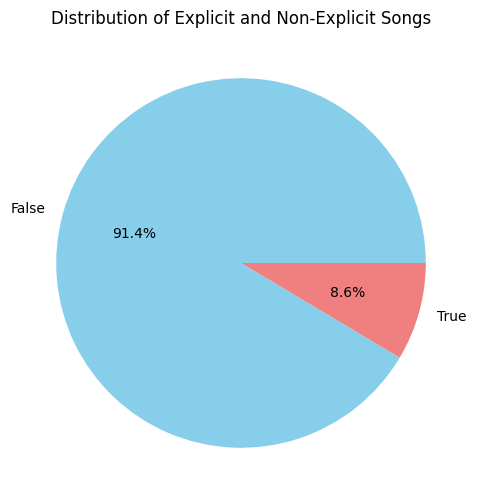

In [31]:
plt.figure(figsize=(6, 6))
plt.pie(explicit_count, labels=explicit_count.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Explicit and Non-Explicit Songs')
plt.show()

---
<h3 style="margin: 0; font-weight: bold;">Danceability</h3>


As with the 'popularity' column, a decision has been made to categorize this column for a better understanding of the column.

In [32]:
categorize_column(df, 'danceability', bins=[0, 0.25, 0.5, 0.75, 1.0], labels=['Very Low', 'Low', 'Medium', 'High'])


count_by_category = df['danceability_category'].value_counts().sort_index()
count_by_category

danceability_category
Very Low     5650
Low         31495
Medium      59499
High        16905
Name: count, dtype: int64

In [33]:
correlation = df.groupby('danceability_category')['popularity'].mean()
correlation

C:\Users\saale\AppData\Local\Temp\ipykernel_8452\1080414110.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = df.groupby('danceability_category')['popularity'].mean()


danceability_category
Very Low    26.891858
Low         33.151707
Medium      34.540648
High        31.515528
Name: popularity, dtype: float64

This suggests a potential trend where songs with moderate danceability levels tend to have higher popularity scores compared to those with very low or high danceability levels.

---
<h3 style="margin: 0; font-weight: bold;">Speechiness</h3>

Like previous columns, this column is also categorized, since its value can contain whether a record is only music, music and speech or only speech.

In [34]:
categorize_column(df, 'speechiness', bins=[0, 0.33, 0.66, 1.0], labels=['Non-speech', 'Music and Speech', 'Speech Only'])

speechiness_category_counts = df['speechiness_category'].value_counts().sort_index()
speechiness_category_counts

speechiness_category
Non-speech          109947
Music and Speech      2724
Speech Only            878
Name: count, dtype: int64

We can relate this column to 'danceability' to consider the possibility of some relationship with this column

In [35]:
correlation = df.groupby('speechiness_category')['danceability'].mean()
correlation

C:\Users\saale\AppData\Local\Temp\ipykernel_8452\1996571210.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = df.groupby('speechiness_category')['danceability'].mean()


speechiness_category
Non-speech          0.565083
Music and Speech    0.646032
Speech Only         0.565927
Name: danceability, dtype: float64

It reveals that songs categorized as "Music and Speech" have the highest average danceability (0.646), followed by those categorized as "Speech Only" (0.566). Interestingly, songs categorized as "Non-speech" also have a relatively high average danceability score (0.565). This suggests that there might be a slight positive correlation between danceability and speechiness, with songs featuring both music and speech having the highest danceability scores. 

---
<h3 style="margin: 0; font-weight: bold;">Valence</h3>


This column is very important, because it takes into account the possible feeling that a person might have when listening to a song.

In [36]:
categorize_column(df, 'valence', bins=[0, 0.5, 0.75, 1.0], labels=['Negative', 'Neutral', 'Positive'])

print(df[['valence', 'valence_category']].head())

   valence valence_category
0    0.715          Neutral
1    0.267         Negative
2    0.120         Negative
3    0.143         Negative
4    0.167         Negative


Podemos ver si las personas que tienen los diferentes sentimientos que categorizamos podrias ser mas propensos a bailar 

In [37]:
correlation = df.groupby('valence_category')['danceability'].mean()
correlation

C:\Users\saale\AppData\Local\Temp\ipykernel_8452\3323224993.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  correlation = df.groupby('valence_category')['danceability'].mean()


valence_category
Negative    0.504610
Neutral     0.620207
Positive    0.672759
Name: danceability, dtype: float64

The analysis reveals that songs categorized as having a "Positive" valence exhibit the highest average danceability (0.673), followed by those categorized as "Neutral" (0.620). Interestingly, even songs categorized as having a "Negative" valence still maintain a moderate level of danceability, albeit lower than the other categories, with an average danceability score of 0.505. This suggests that there might be a positive correlation between valence and danceability, with songs conveying a more positive emotional tone generally being more danceable.

---

<h3 style="margin: 0; font-weight: bold;">Track genre</h3>

We can provide a visual representation of the distribution of song genres in the dataset, allowing for easy identification of the most popular genres.


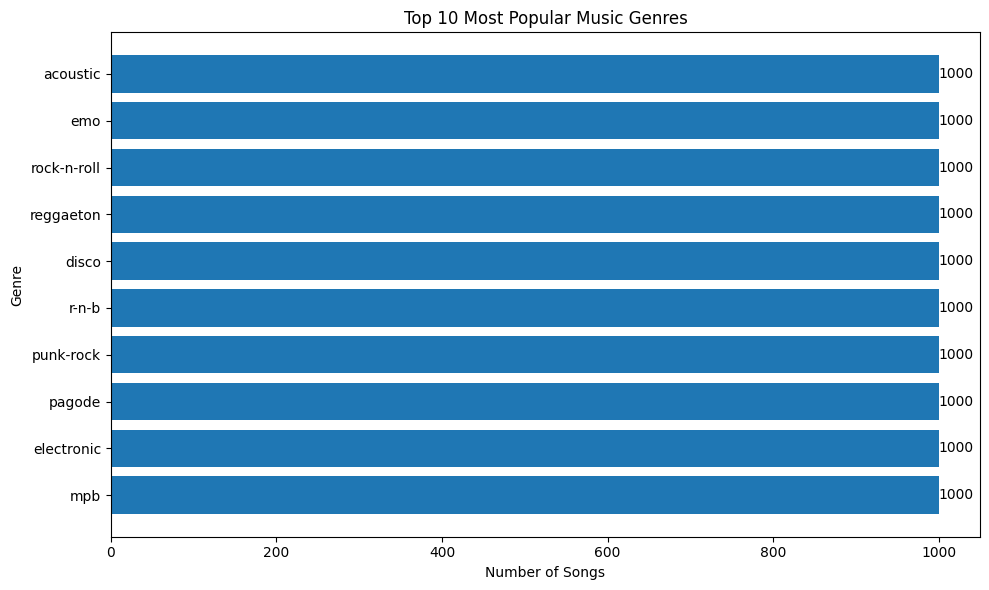

In [38]:
top_10_genres = df['track_genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
bar_plot = plt.barh(top_10_genres.index, top_10_genres.values)

for index, value in enumerate(top_10_genres.values):
    plt.text(value, index, str(value), ha='left', va='center')

plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 Most Popular Music Genres')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()

This suggests that the dataset is well-balanced in terms of song distribution across different genres. Each genre has an equal representation with a consistent count of songs, indicating that no single genre dominates the dataset. But we could obtain better results by categorizing these genres  

In [39]:
map_genre_to_category(df)

df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,valence,tempo,time_signature,track_genre,popularity_category,duration_min_sec,danceability_category,speechiness_category,valence_category,genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0.715,87.917,4,acoustic,Medium-High,03:50,Medium,Non-speech,Neutral,instrumental
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0.267,77.489,4,acoustic,Medium-High,02:29,Low,Non-speech,Negative,instrumental
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0.120,76.332,4,acoustic,Medium-High,03:30,Low,Non-speech,Negative,instrumental
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0.143,181.740,3,acoustic,Medium-High,03:21,Low,Non-speech,Negative,instrumental
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0.167,119.949,4,acoustic,High,03:18,Medium,Non-speech,Negative,instrumental


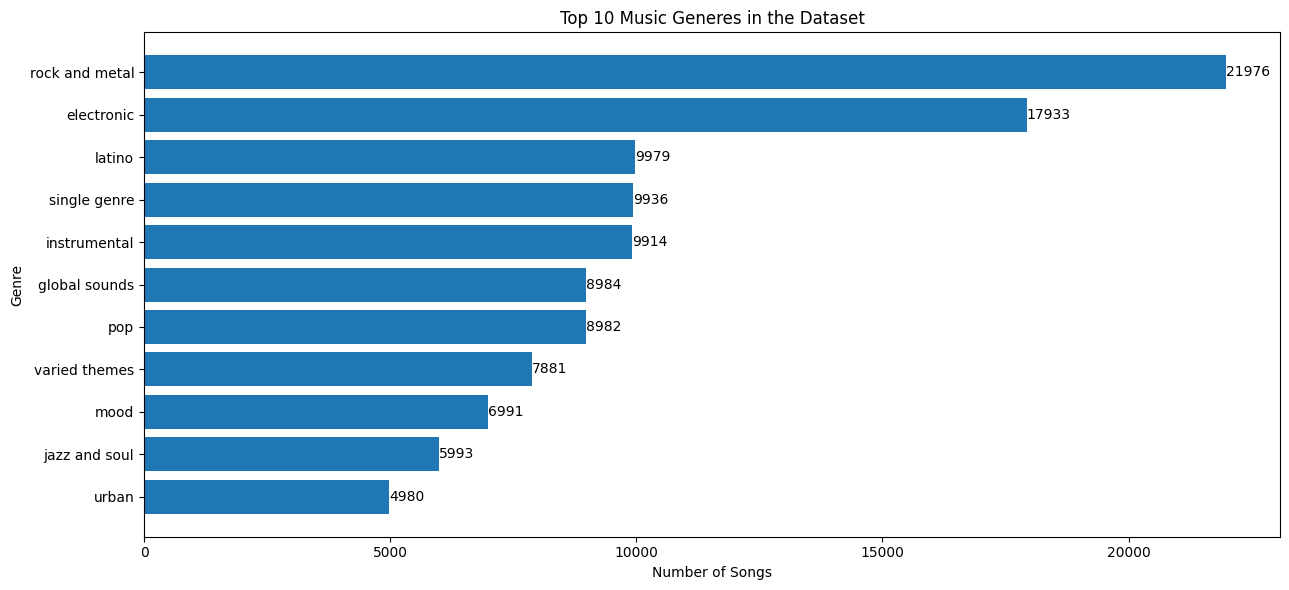

In [40]:
genres_total = df['genre'].value_counts().head(11)

plt.figure(figsize=(13, 6))
bar_plot = plt.barh(genres_total.index, genres_total.values)

for i, v in enumerate(genres_total.values):
    plt.text(v + 0.2, i, str(v), color='black', va='center')

plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.title('Top 10 Music Generes in the Dataset')
plt.gca().invert_yaxis()  
plt.tight_layout()  
plt.show()



After categorizing the genres, we can observe the distribution of songs among different genre categories. The category "rock and metal" has the highest count with 21,976 songs, followed by "electronic" with 17,933 songs. "Latino" occupies the third position with 9,979 songs. Interestingly, there is a category labeled "single genre" with 9,936 songs, indicating a specific genre classification that doesn't fit into broader categories. "Instrumental" and "global sounds" have comparable counts with 9,914 and 8,984 songs, respectively. Genres such as "pop," "varied themes," "mood," "jazz and soul," and "urban" also appear in the list, with decreasing counts, suggesting a diverse range of musical styles and themes represented in the dataset.  

but ¿are these the most popular genres according to the 'popularity' column?


In [41]:
correlation = df.groupby('genre')['popularity'].mean()
print(correlation)


genre
electronic        30.840796
global sounds     30.806434
instrumental      34.151301
jazz and soul     27.377774
latino            34.078966
mood              36.844657
pop               43.672567
rock and metal    35.603522
single genre      33.219304
urban             32.132329
varied themes     23.986931
Name: popularity, dtype: float64


Amazing , "Pop" emerges as the most popular genre, with an average popularity score of 43.67, indicating that songs classified under this genre tend to be highly popular. Following closely behind are "mood" and "rock and metal" genres, with average popularity scores of 36.84 and 35.60, respectively. Genres such as "latino" and "instrumental" also demonstrate relatively high average popularity scores, standing at 34.08 and 34.15, respectively.

In [43]:
df_summary = pd.DataFrame({
    'dtypes': df.dtypes,
    'null count': df.isnull().sum(),
    'unique values': df.nunique(),
    'duplicate count': df.duplicated().sum(),
})

df_summary

,dtypes,null count,unique values,duplicate count
track_id,object,0,89740,0
artists,object,0,31437,0
album_name,object,0,46589,0
track_name,object,0,73608,0
popularity,int64,0,101,0
duration_ms,int64,0,50696,0
explicit,bool,0,2,0
danceability,float64,0,1174,0
energy,float64,0,2083,0
key,int64,0,12,0
